# Taxi service data analysis<br>
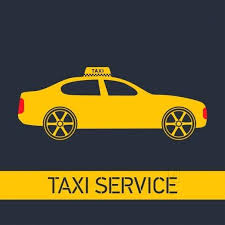

In [ ]:
!pip install reverse_geocoder

Importing libraries 

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import reverse_geocoder as rg 

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Loc_Truth/train.csv")

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Discription about the columns :

* id - a unique identifier for each trip <br>
* vendor_id - a code indicating the provider associated with the trip record<br>
* pickup_datetime - date and time when the meter was engaged<br>
* dropoff_datetime - date and time when the meter was disengaged<br>
* passenger_count - the number of passengers in the vehicle (driver entered value)<br>
* pickup_longitude - the longitude where the meter was engaged<br>
* pickup_latitude - the latitude where the meter was engaged<br>
* dropoff_longitude - the longitude where the meter was disengaged<br>
* dropoff_latitude - the latitude where the meter was disengaged<br>
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor because the vehicle did not have a connection to
the server - Y=store and forward; N=not a store and forward trip <br>
* trip_duration - duration of the trip in seconds

In [ ]:
data.shape

(1458644, 11)

In [ ]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
print("Number of vendors : ",len(np.unique(data["vendor_id"])))
print(data["vendor_id"].value_counts())

Number of vendors :  2
2    780302
1    678342
Name: vendor_id, dtype: int64


## Analyze pickup timings 

I want to find out what is the rush and weak hours for the business.

In [ ]:
pickup_timing = {}
for i in data["pickup_datetime"]:
  i = int(i.split(" ")[1].split(":")[0])
  pickup_timing[i] = pickup_timing.get(i, 0) +1

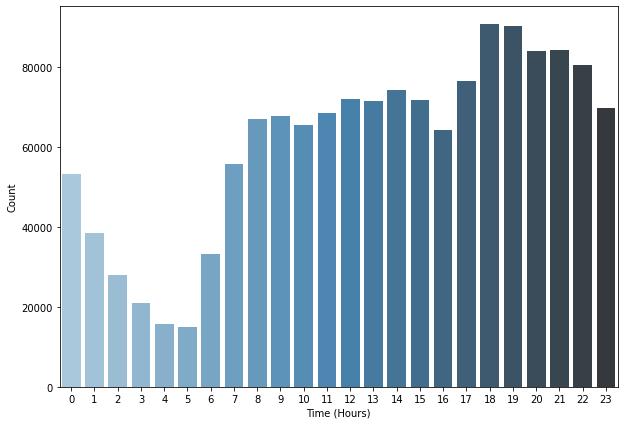

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.barplot(
    x=list(pickup_timing.keys()), 
    y=list(pickup_timing.values()), 
    palette="Blues_d")
ax.set(xlabel="Time (Hours)", ylabel = "Count")
plt.show()

So, we know from the experience that in real world we have some scenario :<br>
* Booking in the night will be low.
* Booking in the morning and evening should be on the peak.<br>

So, as we can see from the pickup time that:
<br>
* Counts are less during night from (1-6 approx).
* Rush hours in morning (7-11) and in evening (17-22).   

In [ ]:
dropoff_timing = {}
for i in data["dropoff_datetime"]:
  i = int(i.split(" ")[1].split(":")[0])
  dropoff_timing[i] = dropoff_timing.get(i, 0) +1

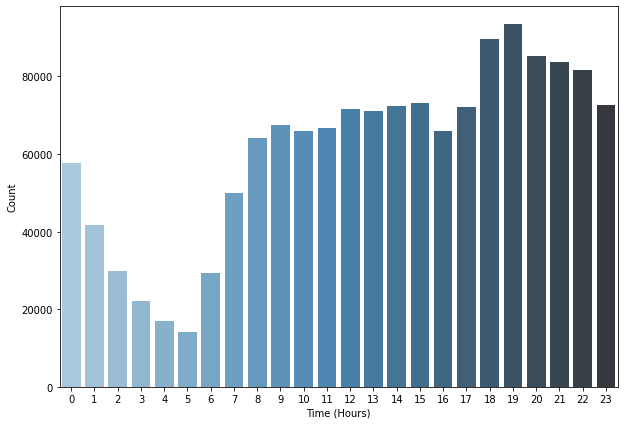

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.barplot(
    x=list(dropoff_timing.keys()), 
    y=list(dropoff_timing.values()), 
    palette="Blues_d")
ax.set(xlabel="Time (Hours)", ylabel = "Count")
plt.show()

It is having almost the same trend as pickup datetime has. <br>
Let's see how trip duration is distributed in data.

In [ ]:
data["Trip_duration(in mins)"] = round(data["trip_duration"] / 60, 0)

In [ ]:
time_duration = {}
for i in data["Trip_duration(in mins)"]:
  if 0<=i<10: time_duration['10'] = time_duration.get('10', 0)+1
  elif 10<=i<20: time_duration['20'] = time_duration.get('20', 0)+1
  elif 20<=i<30: time_duration['30'] = time_duration.get('30', 0)+1
  elif 30<=i<40: time_duration['40'] = time_duration.get('40', 0)+1
  elif 40<=i<50: time_duration['50'] = time_duration.get('50', 0)+1
  elif 50<=i<60: time_duration['60'] = time_duration.get('60', 0)+1
  elif 60<=i<70: time_duration['70'] = time_duration.get('70', 0)+1
  elif 70<=i<80: time_duration['80'] = time_duration.get('80', 0)+1
  elif 80<=i<90: time_duration['90'] = time_duration.get('90', 0)+1
  elif 90<=i<100: time_duration['100'] = time_duration.get('100', 0)+1
  else: time_duration['>100'] = time_duration.get('>100', 0)+1

time_duration = dict(sorted(time_duration.items(), key=lambda x: x[0]))

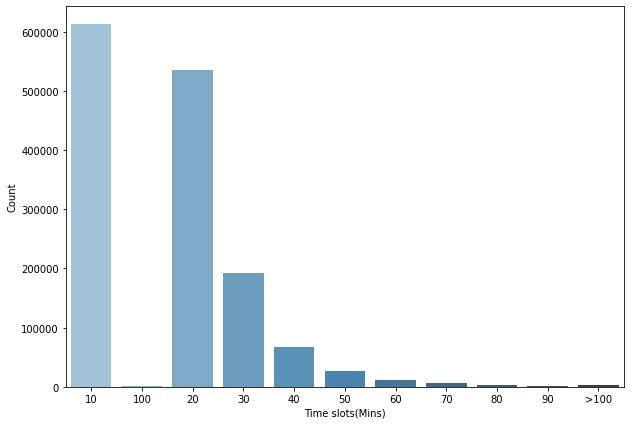

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.barplot(
    x=list(time_duration.keys()), 
    y=list(time_duration.values()), 
    palette="Blues_d")
ax.set(xlabel="Time slots(Mins)", ylabel = "Count")
plt.show()

As we can see usually we had small trips in terms of time.<br>

It's just an assumption that none going to take a trip over 8 hour :
```
data[data["Trip_duration(in mins)"]>500].shape
>>> (2031, 12)
2031/data.shape[0]*100
>>> 0.139
```
As we can see that percentage is very less over 500 min so we can easily drop them.


In [ ]:
print("Earlier the shape is :",data.shape)
data = data[data["Trip_duration(in mins)"]<500]
print("\nNow the shape is :",data.shape)

Earlier the shape is : (1458644, 12)

Now the shape is : (1456612, 12)


## Number of Passengers

As per Uber max number of persons allowed are 6 :

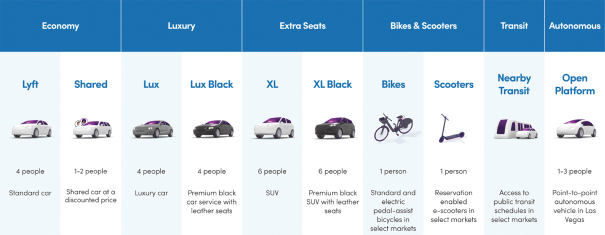

<br>
But in out dataset we have :<br>

```
data.passenger_count.unique()
>>> array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8])
```



Let's find out how many rides have more than 6 passengers.<br>

```
data[data["passenger_count"]>6].shape
>>> (5, 12)
```
And, guess what :<br>
We also has 0 passengers : <br>

```
data[data["passenger_count"]==0].shape
>>> (59, 12)
```
So, we can easily drop them. 


In [ ]:
print("Earlier the shape is :",data.shape)
data = data[data["passenger_count"]<=6]
data = data[data["passenger_count"]!=0]
print("\nNow the shape is :",data.shape)

Earlier the shape is : (1456612, 12)

Now the shape is : (1456548, 12)


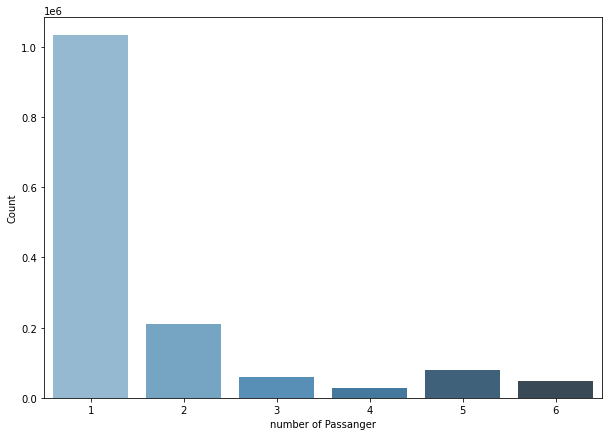

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.barplot(
    x=list([1,2,5,3,6,4]), 
    y=list(data["passenger_count"].value_counts()), 
    palette="Blues_d")
ax.set(xlabel="number of Passanger", ylabel = "Count")
plt.show()

# Validating time duration giving 

Never trust your data without validating them.

In [ ]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])
data["dropoff_datetime"] = pd.to_datetime(data["dropoff_datetime"])

In [ ]:
seconds = (data["dropoff_datetime"] - data["pickup_datetime"]).apply(lambda x: x.total_seconds())

In [ ]:
data["seconds"] = seconds
print((data["seconds"]==data["trip_duration"]).value_counts())
data = data.drop("seconds", axis=1)

True    1456548
dtype: int64


Here, we are lucky that we get a cleaned one.

According to the Google : <br>

* Possible values for Longitude : (-180 to 180)

* Possible values for Latitude : (-90 to 90)

Let's verify our data accordingly :

In [ ]:
temp_longi = [True if -180 < i< 180 else False for i in data["pickup_longitude"]]
temp1_longi = [True if -180 < i< 180 else False for i in data["dropoff_longitude"]]

temp_lati = [True if -90 < i< 90 else False for i in data["pickup_latitude"]]
temp1_lati = [True if -90 < i< 90 else False for i in data["dropoff_latitude"]]

In [ ]:
if sum(temp_lati) == data.shape[0] : print("Pickup Latitude is in the range.\n")
if sum(temp1_lati) == data.shape[0] : print("Dropoff Latitude is in the range.\n")
if sum(temp_longi) == data.shape[0] : print("Pickup Longitude is in the range.\n")
if sum(temp1_longi) == data.shape[0] : print("Dropoff Longitude is the range.\n")

Pickup Latitude is in the range.

Dropoff Latitude is in the range.

Pickup Longitude is in the range.

Dropoff Longitude is the range.



I used reverse_geocoder for finding the name of the locations using longitude and latitude.

I found that the cordinates in the datsets are not right may be data provider changes them for the safety( that is ok.) <br>

I am saying that because I found some cordinates are from antartica as well and I don't think taxi service is available there.<br>

According to Google Map cordinates providing in the dataset are marked in this triangle area :
<br>(which doesn't seems plausible to me)
<br>
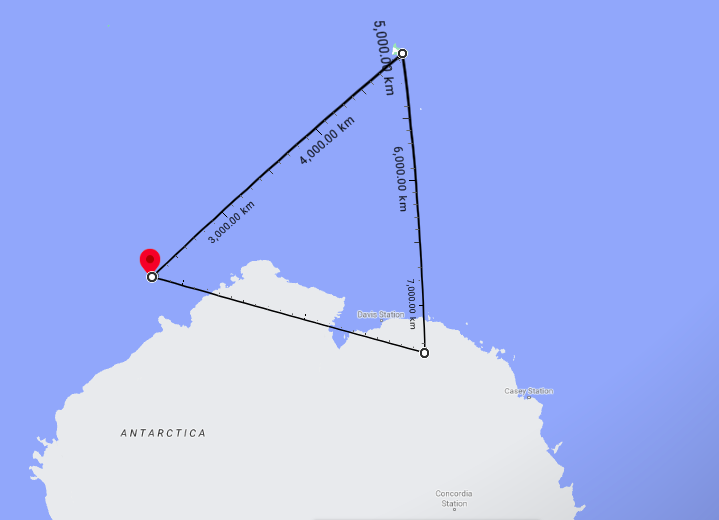

Then, I am assuming this whole dataset is within a small range, so I am considering this belongs to same area :<br>


* I am creating a dashboard using this location : <br>
* Port-aux-Francais : (-73.982155, 40.767937 ) <br>


```
rg.search((-73.982155 ,40.767937))
>>> [OrderedDict([('lat', '-49.35'),
              ('lon', '70.21667'),
              ('name', 'Port-aux-Francais'),
              ('admin1', 'Kerguelen'),
              ('admin2', ''),
              ('cc', 'TF')])]
```

Also considering +/-0.02 in longitude and latitude.

# Question 4

Location is <strong>Port-aux-Francais</strong> :

In [ ]:
temp_data = data[data['pickup_longitude'].between(-74, -73.96, inclusive=False)]
temp_data = temp_data[temp_data['pickup_latitude'].between(40.74, 40.78, inclusive=False)]

Trips_started = temp_data.shape[0]
Peoples_started = sum(temp_data["passenger_count"])

temp_data = data[data['dropoff_longitude'].between(-74, -73.96, inclusive=False)]
temp_data = temp_data[temp_data['dropoff_latitude'].between(40.74, 40.78, inclusive=False)]

Trips_ended = temp_data.shape[0]
Peoples_ended = sum(temp_data["passenger_count"])

In [ ]:
print("***************** Port-aux-Francais *******************")
print("\nStarting : \n a) Trips : {}\n b) Peoples : {}".format(Trips_started, Peoples_started))
print("\nEnding : \n a) Trips : {}\n b) Peoples : {}".format(Trips_ended, Peoples_ended))

***************** Port-aux-Francais *******************

Starting : 
 a) Trips : 695951
 b) Peoples : 1154904

Ending : 
 a) Trips : 633371
 b) Peoples : 1053869


# Question 5

So I found that many coordinates are belongs to <strong>"Port-aux-Francais"</strong>, so I am assuming that user ask for this place only :

<br>
Solution would be :<br>

* Find out the city name using reverse_geocoder and save it as a column in the dataset but as I mentioned I found many of the cordinates belongs to same city or not found by the API. 
* So I am searching using coordinates only, this may be done by using city names also.

Here I am using Port-aux-Francais 's coordinates as default values.

In [ ]:
print("Enter a tourist place coordinates : \n\n Conditions : \n a) Possible values for Longitude : (-180 to 180)\n b) Possible values for Latitude : (-90 to 90)\n")
while True:
  print("Enter longitude : ")
  longitude = float(input())
  if -180<longitude<180: break
  else : longitude = -73.982155; break
while True: 
  print("Enter latitude : ")
  latitude = float(input())
  if -90<latitude<90: break
  else: latitude = 40.767937; break

Enter a tourist place coordinates : 

 Conditions : 
 a) Possible values for Longitude : (-180 to 180)
 b) Possible values for Latitude : (-90 to 90)

Enter longitude : 
1223
Enter latitude : 
2312321


Now it will choose default values.

In [ ]:
if longitude <0:
    temp_data_pickup = data[data['pickup_longitude'].between(longitude-0.02, longitude+0.02, inclusive=False)]
    temp_data_drop = data[data['dropoff_longitude'].between(longitude-0.02, longitude+0.02, inclusive=False)]
else:
    temp_data_pickup = data[data['pickup_longitude'].between(longitude+0.02, longitude-0.02, inclusive=False)]
    temp_data_drop = data[data['dropoff_longitude'].between(longitude+0.02, longitude-0.02, inclusive=False)]

if latitude<0 :
    temp_data_pickup = temp_data_pickup[temp_data_pickup['pickup_latitude'].between(latitude-0.02, latitude+0.02, inclusive=False)]
    temp_data_drop = temp_data_drop[temp_data_drop['pickup_latitude'].between(latitude-0.02, latitude+0.02, inclusive=False)]
else:
    temp_data_pickup = temp_data_pickup[temp_data_pickup['pickup_latitude'].between(latitude-0.02, latitude+0.02, inclusive=False)]
    temp_data_drop = temp_data_drop[temp_data_drop['pickup_latitude'].between(latitude-0.02, latitude+0.02, inclusive=False)]

In [ ]:
print("***************** Coordinates :({}, {}) *******************".
      format(longitude, latitude))
print("\nStarting : \n a) Trips : {}\n b) Peoples : {}".
      format(temp_data_pickup.shape[0], sum(temp_data_pickup["passenger_count"])))
print("\nEnding : \n a) Trips : {}\n b) Peoples : {}".
      format(temp_data_drop.shape[0], sum(temp_data_drop["passenger_count"])))

***************** Coordinates :(-73.982155, 40.767937) *******************

Starting : 
 a) Trips : 590037
 b) Peoples : 980316

Ending : 
 a) Trips : 532015
 b) Peoples : 883210


# Question 6

In [ ]:
starting_loc = {}
for i in range(data.shape[0]):
  key = (data["pickup_longitude"].iloc[i], data["pickup_latitude"].iloc[i])
  starting_loc[key] = starting_loc.get(
      key, 0
  )+1

In [ ]:
print("Coordinates where maximum drivers started are : ", max(
    starting_loc.items(), key=lambda x: x[1] 
))

Coordinates where maximum drivers started are :  ((-73.95466613769531, 40.82100296020508), 39)
